In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
input_data = pd.read_csv("drug200.csv")
input_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Data Anaysis

In [3]:
input_data['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [4]:
print(input_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [5]:
input_data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [6]:
input_data['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [7]:
input_data['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [8]:
input_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


### Distributions

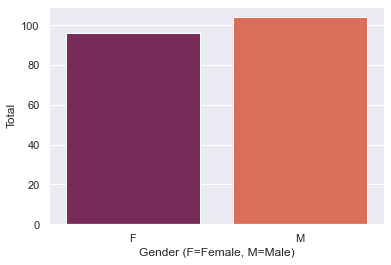

In [9]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=input_data, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

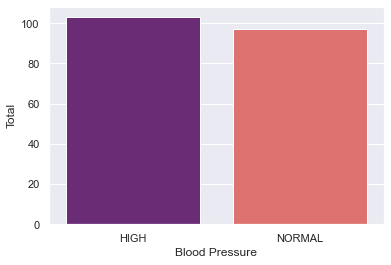

In [10]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=input_data, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

In [11]:
bin_age = [ 0,20,30,40,50,60,70,80] 
category_age = [ '<20','20s', '30s', '40s', '50s', '60s', '70s']
input_data['Age_binned'] = pd.cut(input_data['Age'], bins=bin_age, labels=category_age)
# input_data = input_data.drop(['Age'], axis = 1)
# input_data.to_csv("Del.csv")

In [12]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
input_data['Na_to_K_binned'] = pd.cut(input_data['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
# input_data = input_data.drop(['Na_to_K'], axis = 1)
input_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_binned,Na_to_K_binned
0,23,F,HIGH,HIGH,25.355,drugY,20s,20-30
1,47,M,LOW,HIGH,13.093,drugC,40s,10-20
2,47,M,LOW,HIGH,10.114,drugC,40s,10-20
3,28,F,NORMAL,HIGH,7.798,drugX,20s,<10
4,61,F,LOW,HIGH,18.043,drugY,60s,10-20


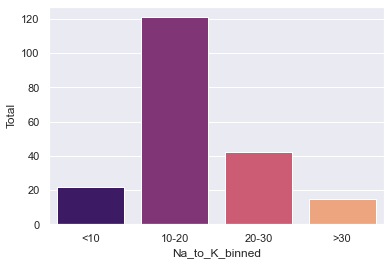

In [13]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Na_to_K_binned", data=input_data, palette="magma")
plt.xlabel('Na_to_K_binned')
plt.ylabel('Total')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X = input_data.drop(["Drug"], axis=1)
y = input_data["Drug"]

In [15]:
from sklearn.model_selection import train_test_split # to split the data int train and test of X and Y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
# pd.get_dummies() is used for data manipulation. 
#It converts categorical data into dummy or indicator variables.
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [17]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [18]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


# SMOTE stands for Synthetic Minority Over-sampling Technique

SMOTE is an over-sampling technique that generates synthetic samples for the minority class by creating new instances similar to the existing ones. This helps balance the class distribution and improves the machine learning algorithm’s performance.

In [19]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [20]:
# from sklearn.neighbors import KNeighborsClassifier
# KNclassifier = KNeighborsClassifier(n_neighbors=20)
# KNclassifier.fit(X_train, y_train)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
# creating odd list of K for KNN
from sklearn.model_selection import cross_val_score
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty dict that will hold cv scores
cv_scores = {}

# perform CV = 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores[k] = scores.mean()

print(cv_scores)
print("Optimal K value:")

optimal_k = max(cv_scores, key=cv_scores.get)
print(optimal_k)

{1: 0.9161313686313685, 3: 0.8328220113220113, 5: 0.7885684446272683, 7: 0.7424217351276174, 9: 0.6876948579456318, 11: 0.6712980031664243, 13: 0.6271689976689977, 15: 0.6221898656898657, 17: 0.5746173662938369, 19: 0.5645264996441466, 21: 0.5399183137124314, 23: 0.5302801969272556, 25: 0.5312950448244566, 27: 0.5250228333757745, 29: 0.5211567931552451, 31: 0.5163447228725866, 33: 0.5042434026242076, 35: 0.4873026375069719, 37: 0.4885905162948506, 39: 0.48551257789338287, 41: 0.48544168799896353, 43: 0.4752814854564081, 45: 0.4684998879689283, 47: 0.4560082913302727, 49: 0.44950969189049683}
Optimal K value:
1


In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=1)
KNclassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
from sklearn.metrics import accuracy_score
train_pred = KNclassifier.predict(X_train)
# evaluate accuracy
acc = accuracy_score(y_train, train_pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 1 is 100.000000%


In [28]:
from sklearn.metrics import accuracy_score
test_pred = KNclassifier.predict(X_test)
# evaluate accuracy
acc = accuracy_score(y_test, test_pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 1 is 68.333333%


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# neighbors = range(10**-4 , 10**4)

# empty dict that will hold cv scores
cv_scores = {}

# perform CV = 10-fold cross validation
for C_val in [0.0001,0.001,0.01,0.1,1,10,100,1000]:
    lg = LogisticRegression(C=C_val,random_state=0,solver='liblinear')
    scores = cross_val_score(lg, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores[k] = scores.mean()

print(cv_scores)
print("Optimal K value:")

optimal_C = max(cv_scores, key=cv_scores.get)
print(optimal_C)

{49: 0.9770967741935485}
Optimal K value:
49


In [38]:
lg = LogisticRegression(C=49,random_state=0,solver='liblinear')
lg.fit(X_train, y_train)
test_pred = lg.predict(X_test)
# evaluate accuracy
acc = accuracy_score(y_test, test_pred) * 100
print('\nThe accuracy of the lg classifier for C = %d is %f%%' % (optimal_C, acc))


train_pred = lg.predict(X_train)
# evaluate accuracy
acc = accuracy_score(y_train, train_pred) * 100
print('\nThe train accuracy of the lg classifier for C = %d is %f%%' % (optimal_C, acc))


The accuracy of the lg classifier for C = 49 is 96.666667%

The train accuracy of the lg classifier for C = 49 is 99.672131%


In [43]:
from sklearn.tree import DecisionTreeClassifier
cv_scores = {}

# perform CV = 10-fold cross validation
for max_depth_val in [1,2,3,4,5,6]:
    dt = DecisionTreeClassifier(max_depth=max_depth_val,random_state=0)
    scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores[max_depth_val] = scores.mean()

print(cv_scores)
print("Optimal depth value:")

optimal_depth = max(cv_scores, key=cv_scores.get)
print(optimal_depth)

{1: 0.3967741935483871, 2: 0.5935483870967742, 3: 0.941290322580645, 4: 0.9935483870967742, 5: 0.9935483870967742, 6: 0.9935483870967742}
Optimal depth value:
4


In [44]:
dt = DecisionTreeClassifier(max_depth=4,random_state=0)
dt.fit(X_train, y_train)
test_pred = dt.predict(X_test)
# evaluate accuracy
acc = accuracy_score(y_test, test_pred) * 100
print('\nThe accuracy of the lg classifier for C = %d is %f%%' % (optimal_C, acc))


train_pred = dt.predict(X_train)
# evaluate accuracy
acc = accuracy_score(y_train, train_pred) * 100
print('\nThe train accuracy of the lg classifier for C = %d is %f%%' % (optimal_C, acc))


The accuracy of the lg classifier for C = 49 is 100.000000%

The train accuracy of the lg classifier for C = 49 is 100.000000%
